Import Libraries

In [133]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from tensorflow.keras.utils import load_img, img_to_array
import os

Create File Directories
Change 'data_dir' file path to the file path were the database has been stored
Note that the dataset is broken down into training, validation, and testing.

In [134]:
# Parameters
img_size = (128, 128)
# Update this to the actual dataset path
data_dir = r"C:\Users\kyle_\OneDrive\Desktop\school_projects\456_project\archive_1\chest_xray"
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

Load Dataset

In [135]:
def load_data(data_path):
    X, y = [], []
    class_names = sorted(os.listdir(data_path)) 
    class_indices = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    # Load and resize image in RGB
                    img = load_img(image_path, target_size=img_size)
                    # Normalize pixel values
                    img_array = img_to_array(img) / 255.0 
                    X.append(img_array)
                    y.append(class_indices[class_name])
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

    return np.array(X), np.array(y)

use our load_data function to get Training, validation, and testing sets

In [136]:
# Load train, validation, and test data
X_train, y_train = load_data(train_dir)
X_valid, y_valid = load_data(val_dir)
X_test, y_test = load_data(test_dir)

Build a neural network model

In [137]:
cnn = tf.keras.models.Sequential()  # Initializing the CNN

# Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", input_shape=(128, 128, 3)))  # Convolution 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))  # Convolution 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))  # Convolution 3
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"))  # Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"))  # Convolution 5
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # Pooling 3

# Connected layers
cnn.add(tf.keras.layers.Flatten())  # Flattening
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))  # Full Connection 1
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))  # Full Connection 2
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # Output Layer for binary classification

C:\Users\kyle_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [138]:
cnn.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 128, 128, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,513,217 (36.29 MB)

 Trainable params: 9,513,217 (36.29 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model

In [139]:
cnn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


Training Neural Netwrok Model:

In [140]:
history = cnn.fit(X_train, y_train,batch_size=32,epochs=5,validation_data=(X_valid, y_valid))

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 671ms/step - accuracy: 0.7370 - loss: 0.5726 - val_accuracy: 0.6250 - val_loss: 1.0773
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 684ms/step - accuracy: 0.9075 - loss: 0.2494 - val_accuracy: 0.8125 - val_loss: 0.4233
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 698ms/step - accuracy: 0.9500 - loss: 0.1474 - val_accuracy: 0.6875 - val_loss: 0.4698
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 701ms/step - accuracy: 0.9582 - loss: 0.1137 - val_accuracy: 0.8750 - val_loss: 0.2595
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 702ms/step - accuracy: 0.9688 - loss: 0.0974 - val_accuracy: 0.7500 - val_loss: 0.5520


Evaluation:

In [141]:
score = cnn.evaluate(X_test, y_test)
print('Total loss on Test Set:', score[0])
print('Accuracy on Test Set:', score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5174 - loss: 2.8734
Total loss on Test Set: 1.6400803327560425
Accuracy on Test Set: 0.7371794581413269


Predicting the three images where one image will have pneumonia

In [161]:
X_indices = np.where(y_test == 1)[0][:1]  # Ensure at least one image with true value of 1
remaining_indices = np.where(y_test == 0)[0][:2]  # Fill the rest with images with true value of 0
selected_indices = np.concatenate([X_indices, remaining_indices])

In [162]:
X_new = X_test[selected_indices]
y_proba = cnn.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[1.  ],
       [0.91],
       [0.97]], dtype=float32)

In [163]:
y_pred = np.argmax(cnn.predict(X_new), axis=-1)
print("Predicted Labels:", y_pred)
print("True Labels:", y_test[selected_indices])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Labels: [0 0 0]
True Labels: [1 0 0]


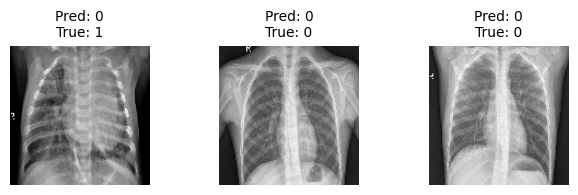

In [164]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Pred: {y_pred[index]}\nTrue: {y_test[selected_indices[index]]}", fontsize=10)
plt.subplots_adjust(wspace=0.5)
plt.show()
